# Hotel Booking Demand

##### NAME: JORGE CHAVARRIAGA
##### DATE: 2024/06/19
##### PROJECT: Hotel Booking Demand
##### DATASET SOURCE: [Hotel Booking Dataset](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)
##### LANGUAGE: Python V.3.11.6


In [1]:
# Import libraries

import os
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import geopandas as gpd



In [2]:
# Load csv file
hotel = pd.read_csv('hotel_bookings.csv')

# Show first 5 rows
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# Dimensions of the Dataset

hotel_shape = hotel.shape
print(f'# Rows: {hotel_shape[0]:>19}\n# Columns: {hotel_shape[1]:>10}')

# Rows:              119390
# Columns:         32


In [4]:
# Column names

hotel_columns = hotel.columns
for column in hotel_columns:
    print(column)

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
company
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date


In [5]:
# Dataset information

hotel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Convert reservation_status_date from object to datetime format

hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'])

In [7]:
# Non-Null Values Analysis (Ascending Order)

hotel.notnull().sum().sort_values(ascending=True)


company                             6797
agent                             103050
country                           118902
children                          119386
hotel                             119390
total_of_special_requests         119390
required_car_parking_spaces       119390
adr                               119390
customer_type                     119390
days_in_waiting_list              119390
deposit_type                      119390
booking_changes                   119390
assigned_room_type                119390
reserved_room_type                119390
previous_bookings_not_canceled    119390
previous_cancellations            119390
distribution_channel              119390
reservation_status                119390
market_segment                    119390
meal                              119390
babies                            119390
adults                            119390
stays_in_week_nights              119390
stays_in_weekend_nights           119390
arrival_date_day

##### Missing Data Summary: Notable Non-Null Counts

* company: 6797
* agent: 103050
* country: 118902
* children:: 119386

In [8]:
# Missing Data Summary: Count of Null Values

hotel.isna().sum()[hotel.isna().sum() > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [9]:
# Replace NaN values with specified replacements

nan_replacements = {'children': 0, 'country': 'Not Available', 'agent': 0, 'company': 0}
hotel_cleaned = hotel.fillna(nan_replacements)

# Check Completeness After NaN Replacement

hotel_cleaned.notnull().sum().sort_values(ascending=True)


hotel                             119390
total_of_special_requests         119390
required_car_parking_spaces       119390
adr                               119390
customer_type                     119390
days_in_waiting_list              119390
company                           119390
agent                             119390
deposit_type                      119390
booking_changes                   119390
assigned_room_type                119390
reserved_room_type                119390
previous_bookings_not_canceled    119390
previous_cancellations            119390
is_repeated_guest                 119390
distribution_channel              119390
market_segment                    119390
country                           119390
meal                              119390
babies                            119390
children                          119390
adults                            119390
stays_in_week_nights              119390
stays_in_weekend_nights           119390
arrival_date_day

In [10]:
# Average Daily Rate (ADR) Values as float

hotel_cleaned['adr'].head(10)

0      0.0
1      0.0
2     75.0
3     75.0
4     98.0
5     98.0
6    107.0
7    103.0
8     82.0
9    105.5
Name: adr, dtype: float64

In [11]:
# Rounding Average Daily Rate (ADR) Values

hotel_cleaned['adr'] = hotel_cleaned['adr'].round().astype(int)
hotel_cleaned['adr'].head(10)

0      0
1      0
2     75
3     75
4     98
5     98
6    107
7    103
8     82
9    106
Name: adr, dtype: int64

In [12]:
# Summary of Categorical Variables in Cleaned Hotel Data

hotel_cleaned.select_dtypes(include=['object']).describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,178,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


# ANALYSIS

In [13]:
#  Distribution of Hotel Bookings by Country (count & percentage) - Top 10

non_canceled_bookings = hotel_cleaned[hotel_cleaned['is_canceled'] == 0]
country_counts = non_canceled_bookings['country'].value_counts()
total_non_canceled_bookings = len(non_canceled_bookings)
country_percentages = round((country_counts / total_non_canceled_bookings) * 100, 1)
country_distribution = pd.DataFrame({
    'Country': country_counts.index,
    '# Bookings': country_counts.values,
    '% Bookings': country_percentages.values
})
country_distribution = country_distribution.sort_values(by='# Bookings', ascending=False)
top_countries = country_distribution.head(10)
top_countries

,Country,# Bookings,% Bookings
0,PRT,21071,28.0
1,GBR,9676,12.9
2,FRA,8481,11.3
3,ESP,6391,8.5
4,DEU,6069,8.1
5,IRL,2543,3.4
6,ITA,2433,3.2
7,BEL,1868,2.5
8,NLD,1717,2.3
9,USA,1596,2.1


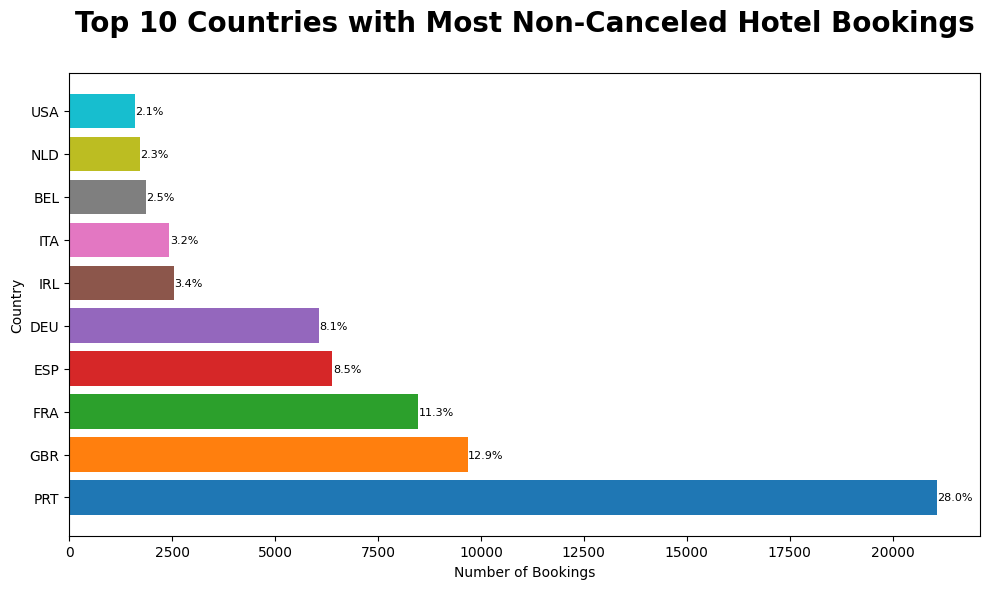

In [14]:
# Bar chart illustrating the Distribution of Hotel Bookings by Country (count & percentage) - Top 10

fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.tab10.colors[:len(top_countries)]

bars = ax.barh(top_countries['Country'], top_countries['# Bookings'], color=colors)
ax.set_xlabel('Number of Bookings')
ax.set_ylabel('Country')
ax.set_title('Top 10 Countries with Most Non-Canceled Hotel Bookings', pad=30, fontdict={'fontsize': '20', 'fontweight': 'bold'})

for bar, percentage in zip(bars, top_countries['% Bookings']):
    ax.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, f'{percentage}%', 
            ha='left', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()


In [15]:
# Analysis of Guest Demographics

statistics = pd.DataFrame({
    'avg': non_canceled_bookings[['adults', 'children', 'babies']].mean(),
    'min': non_canceled_bookings[['adults', 'children', 'babies']].min(),
    'max': non_canceled_bookings[['adults', 'children', 'babies']].max(),
    'count': non_canceled_bookings[['adults', 'children', 'babies']].count(),
    'median': non_canceled_bookings[['adults', 'children', 'babies']].median()
})

statistics

,avg,min,max,count,median
adults,1.829737,0.0,4.0,75166,2.0
children,0.102347,0.0,3.0,75166,0.0
babies,0.010377,0.0,10.0,75166,0.0


Conclusion: 

* The analysis reveals typical guest demographics for adults, children, and infants, highlighting average counts and medians that provide insights into booking patterns.


In [16]:
# Top 5 Busiest Weeks of Hotel Bookings by Year


top_weeks = (
    hotel_cleaned
    .groupby(['arrival_date_year', 'arrival_date_week_number'])
    .size()  
    .reset_index(name='num_bookings')  
    .sort_values(by=['arrival_date_year', 'num_bookings'], ascending=[True, False])  
    .groupby('arrival_date_year')
    .head(5)  
    .sort_values(by=['arrival_date_year', 'num_bookings'], ascending=[True, False])  
    )

top_weeks

,arrival_date_year,arrival_date_week_number,num_bookings
14,2015,41,1401
11,2015,38,1371
12,2015,39,1304
15,2015,42,1222
6,2015,33,1168
68,2016,42,1534
51,2016,25,1468
47,2016,21,1452
44,2016,18,1437
69,2016,43,1420


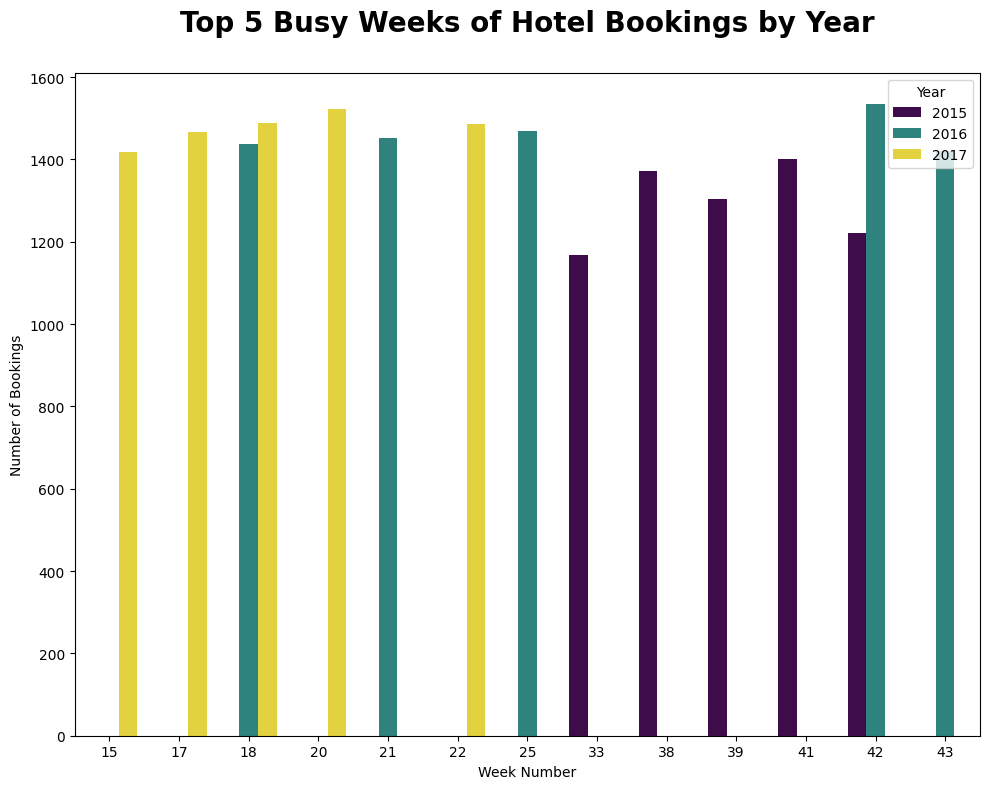

In [17]:
plt.figure(figsize=(10, 8))
sns.barplot(x='arrival_date_week_number', y='num_bookings', hue='arrival_date_year', data=top_weeks, palette='viridis')
plt.title('Top 5 Busy Weeks of Hotel Bookings by Year', pad=30, fontdict={'fontsize': '20', 'fontweight': 'bold'})
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.legend(title='Year')
plt.tight_layout()

plt.show()

Conclusion: 
* Analysis reveals October and May consistently top busiest months, with specific weeks like October 42, 2016, and May 20, 2017, showing peak bookings. Seasonal variations highlight summer months' significance. Insights aid strategic resource planning for hotels,optimizing capacity and guest satisfaction during high-demand periods.

In [18]:
# Hotel Meal Package Preference Analysis

hotel_cleaned_filtered = hotel_cleaned[hotel_cleaned['is_canceled'] == 0]
meal_preference_analysis = (
    hotel_cleaned_filtered
    .groupby(['hotel', 'meal'])
    .agg(
        num_bookings=('hotel', 'size'), 
        average_daily_rate=('adr', 'mean')  
    )
    .reset_index()
)
meal_preference_analysis['average_daily_rate'] = meal_preference_analysis['average_daily_rate'].round(1)
meal_preference_analysis = meal_preference_analysis.sort_values(by=['hotel', 'num_bookings'], ascending=[True, False])

meal_preference_analysis


,hotel,meal,num_bookings,average_daily_rate
0,City Hotel,BB,35638,105.6
3,City Hotel,SC,6601,98.6
2,City Hotel,HB,3980,119.2
1,City Hotel,FB,9,46.9
4,Resort Hotel,BB,22162,83.6
6,Resort Hotel,HB,5499,118.2
8,Resort Hotel,Undefined,883,93.2
5,Resort Hotel,FB,311,135.8
7,Resort Hotel,SC,83,6.3


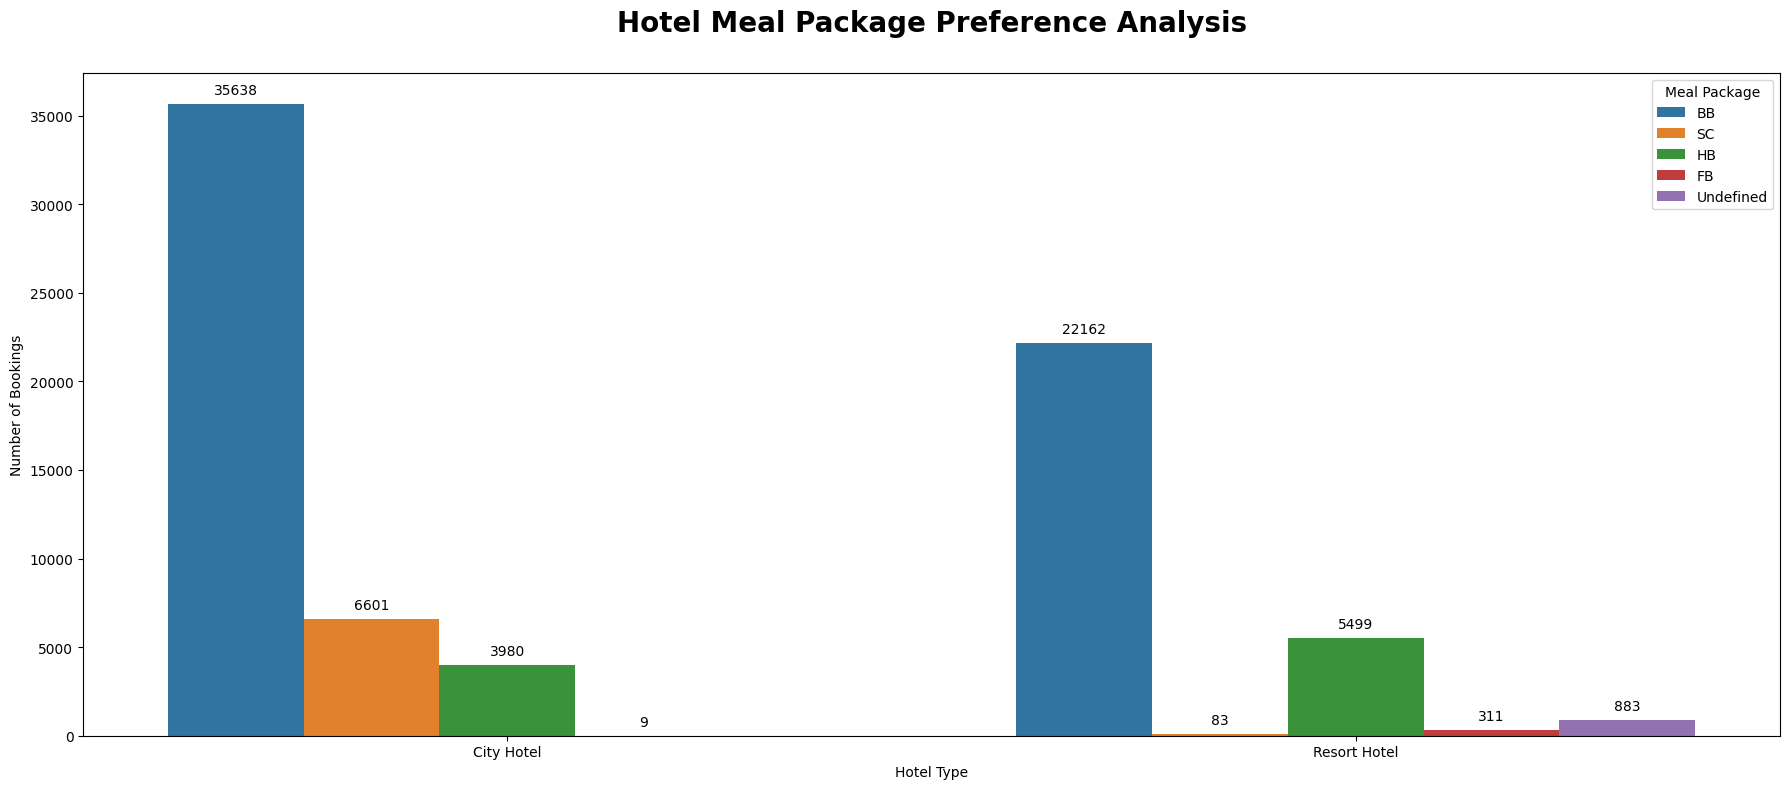

In [19]:
plt.figure(figsize=(18, 8))
meal_preference_analysis = meal_preference_analysis[meal_preference_analysis['num_bookings'] != 0]

meal_preference_analysis['order'] = meal_preference_analysis.groupby('hotel')['num_bookings'].rank(method='first', ascending=False)

meal_preference_analysis = meal_preference_analysis.sort_values(by=['hotel', 'order'])

barplot = sns.barplot(data=meal_preference_analysis, x='hotel', y='num_bookings', hue='meal')
plt.title('Hotel Meal Package Preference Analysis', pad=30, fontdict={'fontsize': '20', 'fontweight': 'bold'})
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Meal Package')

for p in barplot.patches:
    height = p.get_height()
    if height != 0:  
        barplot.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Conclusion: 

* The analysis shows that guests at City Hotels predominantly prefer Bed & Breakfast (BB) packages, while Half Board (HB) also sees significant uptake. In contrast, Full Board (FB) options are less popular. Resort Hotels exhibit similar trends, with BB and HB packages being favored choices.


In [20]:
# Hotel Deposit Type Analysis by Hotel type

deposit_analysis = hotel_cleaned.groupby(['hotel', 'deposit_type']).size().reset_index(name='num_bookings')
deposit_analysis['percentage'] = deposit_analysis.groupby('hotel')['num_bookings'].transform(lambda x: (x / x.sum()) * 100)
deposit_analysis['percentage'] = deposit_analysis['percentage'].round(1)  # Redondear a un decimal
deposit_analysis

,hotel,deposit_type,num_bookings,percentage
0,City Hotel,No Deposit,66442,83.8
1,City Hotel,Non Refund,12868,16.2
2,City Hotel,Refundable,20,0.0
3,Resort Hotel,No Deposit,38199,95.4
4,Resort Hotel,Non Refund,1719,4.3
5,Resort Hotel,Refundable,142,0.4


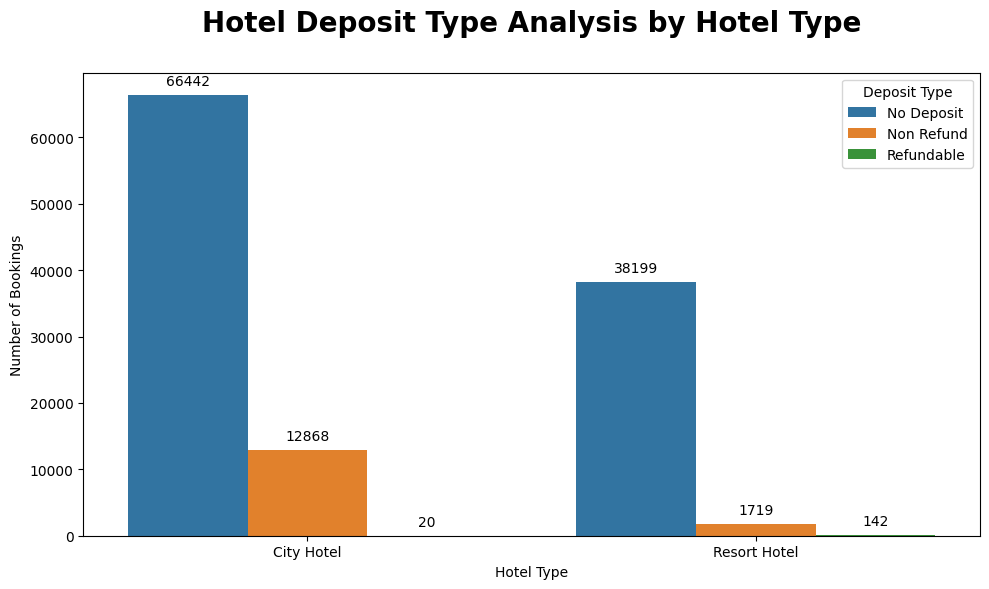

In [21]:

plt.figure(figsize=(10, 6))

barplot = sns.barplot(data=deposit_analysis, x='hotel', y='num_bookings', hue='deposit_type')

plt.title('Hotel Deposit Type Analysis by Hotel Type', pad = 30, fontdict={'fontsize': '20', 'fontweight': 'bold'})
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Deposit Type')

for p in barplot.patches:
    height = p.get_height()
    if height != 0:  
        barplot.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()
plt.show()

Conclusion: 

* Analysis reveals varied deposit preferences between City and Resort hotels, influencing booking strategies and cancellation  rates.

In [22]:
# Analysis of Booking Agents in Hotel Reservations
total_bookings = hotel_cleaned.shape[0]

agent_analysis = hotel_cleaned.groupby('agent').size().reset_index(name='num_bookings')
agent_analysis['percentage'] = (agent_analysis['num_bookings'] / total_bookings) * 100
agent_analysis['percentage'] = agent_analysis['percentage'].round(1)  # Redondear a un decimal
agent_analysis = agent_analysis.sort_values(by='num_bookings', ascending=False).head(10)
agent_analysis


,agent,num_bookings,percentage
9,9.0,31961,26.8
0,0.0,16340,13.7
174,240.0,13922,11.7
1,1.0,7191,6.0
14,14.0,3640,3.0
7,7.0,3539,3.0
6,6.0,3290,2.8
183,250.0,2870,2.4
175,241.0,1721,1.4
27,28.0,1666,1.4


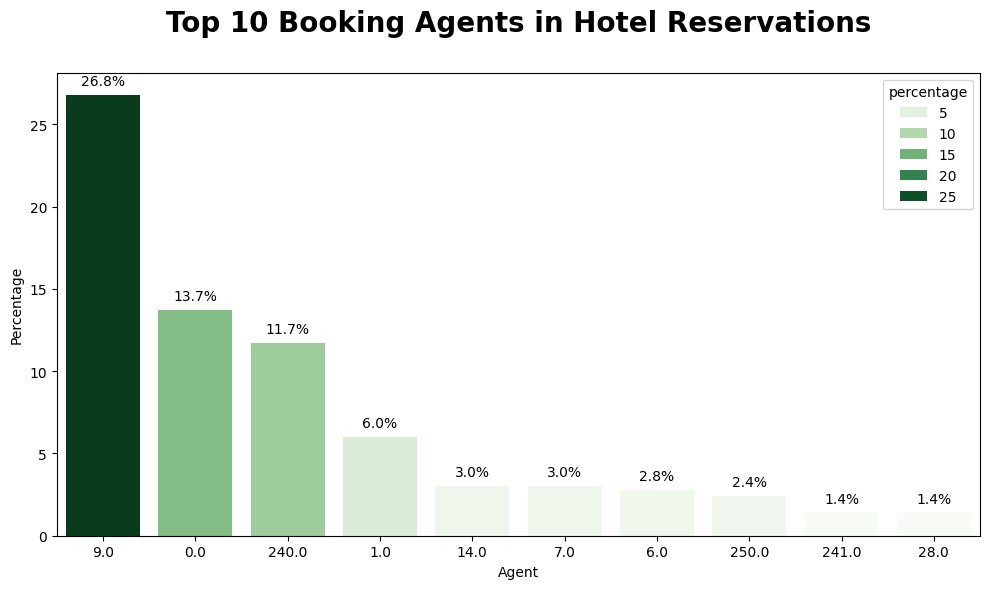

In [23]:
plt.figure(figsize=(10, 6))

agent_analysis = agent_analysis.sort_values('percentage', ascending=False)

barplot = sns.barplot(data=agent_analysis, x='agent', y='percentage', palette='Greens', order=agent_analysis['agent'], hue='percentage')

plt.title('Top 10 Booking Agents in Hotel Reservations', pad=30, fontdict={'fontsize': '20', 'fontweight': 'bold'})
plt.xlabel('Agent')
plt.ylabel('Percentage')

for p in barplot.patches:
    if p.get_height() != 0:  
        barplot.annotate(f'{p.get_height():.1f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 10), 
                        textcoords='offset points',
                        fontsize=10)

plt.tight_layout()
plt.show()


In [24]:
# Relationship between lead time, cancellation by Hotel Type

cancelation_analysis = hotel_cleaned.groupby(['hotel', 'is_canceled']) \
    .agg(avg_lead_time=('lead_time', 'mean'), count=('hotel', 'count')) \
    .reset_index().sort_values('hotel', ascending=False)
cancelation_analysis['avg_lead_time'] = cancelation_analysis['avg_lead_time'].round(1)
cancelation_analysis

,hotel,is_canceled,avg_lead_time,count
2,Resort Hotel,0,78.8,28938
3,Resort Hotel,1,128.7,11122
0,City Hotel,0,80.7,46228
1,City Hotel,1,150.3,33102


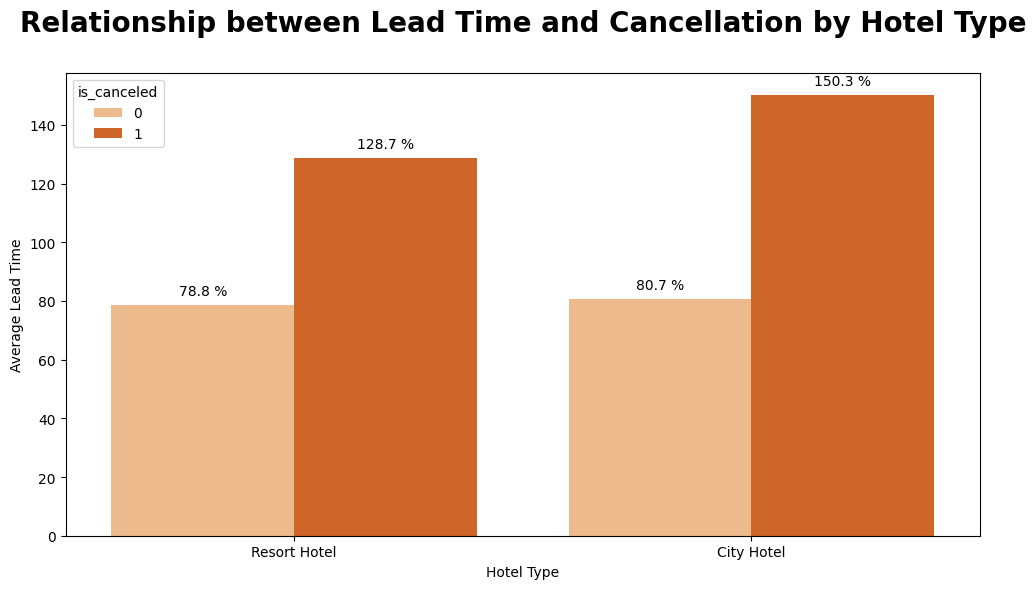

In [25]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='hotel', y='avg_lead_time', hue='is_canceled', data=cancelation_analysis, palette='Oranges')
plt.title('Relationship between Lead Time and Cancellation by Hotel Type', pad=30, fontdict={'fontsize': '20', 'fontweight': 'bold'})
plt.xlabel('Hotel Type')
plt.ylabel('Average Lead Time')

for bar in barplot.containers:
    for p in bar:
        height = p.get_height()  
        x = p.get_x() + p.get_width() / 2
        y = height  
        label = f'{height:.1f} %' 
        plt.annotate(label, (x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Conclusion:
 *	The analysis shows that canceled bookings, particularly in City Hotels, have significantly longer lead times (150.28 days) compared to non-canceled ones (80.70 days). 
 *	For Resort Hotels, cancellations also occur after longer lead times (128.68 days versus 78.84 days). 
 *	This highlights a trend where advanced bookings are more prone to cancellation, especially in City Hotels, emphasizing the need for strategic cancellation policies and capacity management.

In [26]:
# Relationship between deposit type and cancellation by Hotel type

deposit_cancellation_analysis = hotel_cleaned.groupby(['hotel', 'deposit_type', 'is_canceled']).size().reset_index(name='count')
deposit_cancellation_analysis

,hotel,deposit_type,is_canceled,count
0,City Hotel,No Deposit,0,46198
1,City Hotel,No Deposit,1,20244
2,City Hotel,Non Refund,0,24
3,City Hotel,Non Refund,1,12844
4,City Hotel,Refundable,0,6
5,City Hotel,Refundable,1,14
6,Resort Hotel,No Deposit,0,28749
7,Resort Hotel,No Deposit,1,9450
8,Resort Hotel,Non Refund,0,69
9,Resort Hotel,Non Refund,1,1650


Conclusion:

 *	Deposit policies influence cancellation rates; bookings without deposits correlate with higher cancellation frequencies, whereas refundable deposits are associated with lower cancellations.


In [27]:
#  Relationship between market segment and cancellation 

segment_cancellation_analysis = hotel_cleaned.groupby(['market_segment', 'is_canceled']).size().reset_index(name='count')
segment_cancellation_analysis



,market_segment,is_canceled,count
0,Aviation,0,185
1,Aviation,1,52
2,Complementary,0,646
3,Complementary,1,97
4,Corporate,0,4303
5,Corporate,1,992
6,Direct,0,10672
7,Direct,1,1934
8,Groups,0,7714
9,Groups,1,12097


Conclusion:

 *	Conclusion: Market segment significantly influences cancellation rates, highlighting varying cancellation behaviors across different segments, crucial for targeted strategies and operational planning.

In [28]:
# Average price in hotels vary over the year by month

filtered_data = hotel_cleaned[hotel_cleaned['arrival_date_year'].isin([2015, 2016, 2017])]

price_variation = filtered_data.pivot_table(
    values='adr', 
    index='arrival_date_month', 
    columns='arrival_date_year', 
    aggfunc='mean'
).reset_index().round(1)

price_variation.columns = ['arrival_date_month', '2015', '2016', '2017']

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
price_variation['arrival_date_month'] = pd.Categorical(price_variation['arrival_date_month'], categories=month_order, ordered=True)
price_variation = price_variation.sort_values('arrival_date_month')

price_variation

,arrival_date_month,2015,2016,2017
4,January,NaN,64.8,73.8
3,February,NaN,70.1,76.8
7,March,NaN,79.1,82.2
0,April,NaN,88.9,111.4
8,May,NaN,96.4,119.4
6,June,NaN,107.0,125.8
5,July,97.8,125.5,143.0
1,August,105.9,142.9,164.2
11,September,94.8,114.7,NaN
10,October,78.9,95.1,NaN


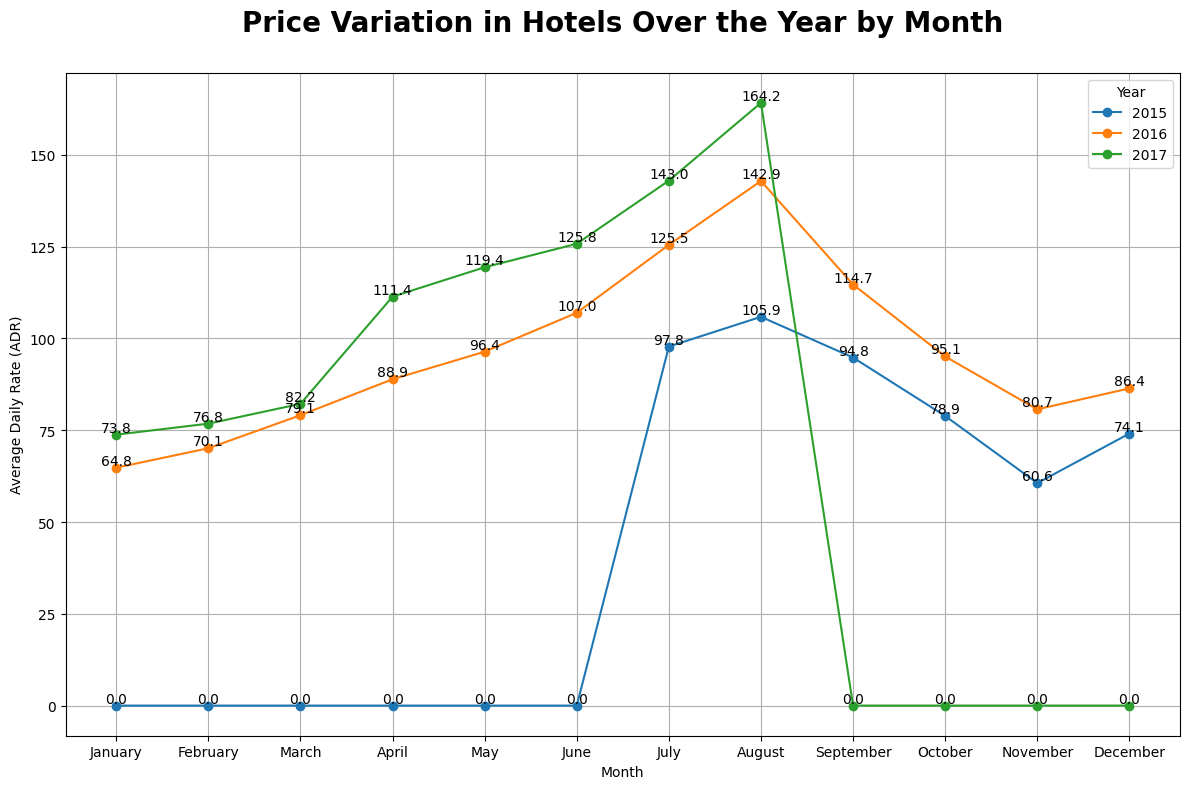

In [29]:
price_variation = pd.DataFrame(price_variation)

plt.figure(figsize=(12, 8))

numeric_columns = ['2015', '2016', '2017']
for col in numeric_columns:
    col_dtype = price_variation[col].dtype
    if isinstance(col_dtype, pd.CategoricalDtype):
        price_variation[col] = pd.to_numeric(price_variation[col], errors='coerce')

price_variation[numeric_columns] = price_variation[numeric_columns].fillna(0)

plt.plot(price_variation['arrival_date_month'], price_variation['2015'], marker='o', label='2015')
plt.plot(price_variation['arrival_date_month'], price_variation['2016'], marker='o', label='2016')
plt.plot(price_variation['arrival_date_month'], price_variation['2017'], marker='o', label='2017')

plt.title('Price Variation in Hotels Over the Year by Month', pad=30, fontdict={'fontsize': '20', 'fontweight': 'bold'})
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Year')
plt.grid(True)

for year in ['2015', '2016', '2017']:
    for i, value in enumerate(price_variation[year]):
        plt.text(i, value, f'{value}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [30]:
# Analysis of Length of Stay by Hotel Type

hotel_cleaned['total_stays'] = hotel_cleaned['stays_in_weekend_nights'] + hotel_cleaned['stays_in_week_nights']
length_of_stay_analysis = hotel_cleaned.groupby(['hotel', 'arrival_date_year', 'arrival_date_month']).agg(
    avg_length_of_stay=('total_stays', 'mean')
).reset_index()

length_of_stay_analysis['avg_length_of_stay'] = length_of_stay_analysis['avg_length_of_stay'].round(1)

length_of_stay_analysis


,hotel,arrival_date_year,arrival_date_month,avg_length_of_stay
0,City Hotel,2015,August,2.7
1,City Hotel,2015,December,3.0
2,City Hotel,2015,July,2.7
3,City Hotel,2015,November,2.9
4,City Hotel,2015,October,2.6
5,City Hotel,2015,September,2.7
6,City Hotel,2016,April,2.9
7,City Hotel,2016,August,3.3
8,City Hotel,2016,December,3.4
9,City Hotel,2016,February,2.8


Conclusion:  

* Resort hotels show longer stays in peak summer months, while city hotels maintain shorter, consistent stays year-round.

In [31]:
# Analysis of Booking Distribution by Customer Type

hotel_cleaned['customer_type1'] = hotel_cleaned['is_repeated_guest'].apply(lambda x: 'Repeated' if x == 1 else 'New')

customer_type_analysis = hotel_cleaned.groupby('customer_type1').size().reset_index(name='num_bookings')

total_bookings = customer_type_analysis['num_bookings'].sum()
customer_type_analysis['percentage'] = round((customer_type_analysis['num_bookings'] / total_bookings) * 100, 1)

customer_type_analysis


,customer_type1,num_bookings,percentage
0,New,115580,96.8
1,Repeated,3810,3.2


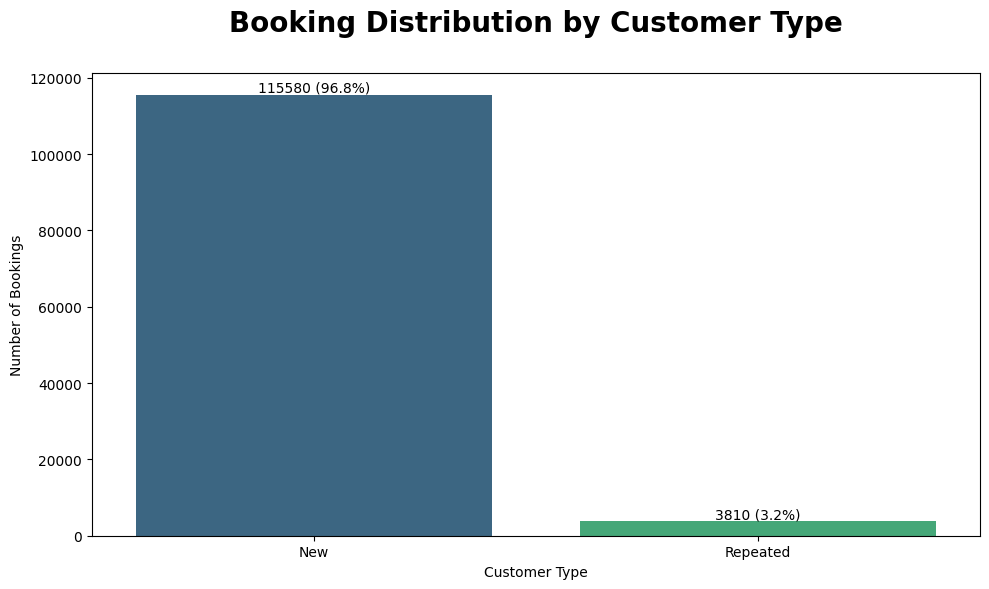

In [32]:

plt.figure(figsize=(10, 6))
sns.barplot(data=customer_type_analysis, x='customer_type1', y='num_bookings', palette='viridis', hue='customer_type1')

plt.title('Booking Distribution by Customer Type', pad=30, fontdict={'fontsize': '20', 'fontweight': 'bold'})
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')

for index, row in customer_type_analysis.iterrows():
    plt.text(index, row['num_bookings'], f'{row["num_bookings"]} ({row["percentage"]}%)', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


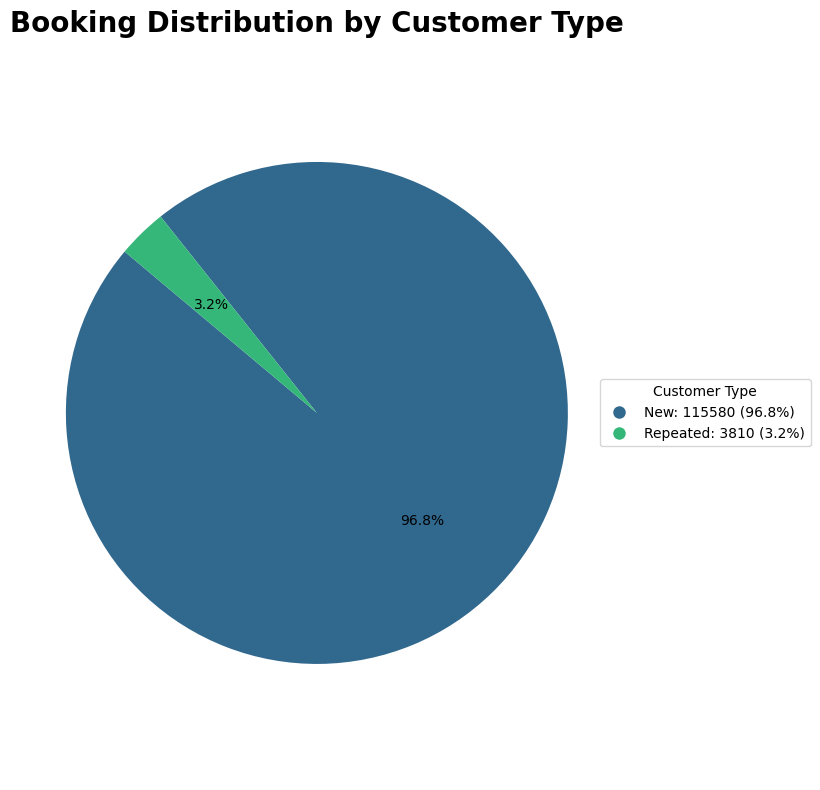

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))
colors = sns.color_palette('viridis', n_colors=len(customer_type_analysis))

wedges, texts, autotexts = ax.pie(
    customer_type_analysis['num_bookings'], 
    labels=None, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    textprops={'fontsize': 10}
)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
labels = [f'{customer_type_analysis["customer_type1"][i]}: {customer_type_analysis["num_bookings"][i]} ({customer_type_analysis["percentage"][i]}%)' for i in range(len(customer_type_analysis))]
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, title='Customer Type')

plt.title('Booking Distribution by Customer Type', pad=10, fontdict={'fontsize': '20', 'fontweight': 'bold'})

plt.axis('equal') 
plt.tight_layout()
plt.show()


Conclusion: 

* The analysis indicates that the majority of bookings are from new customers (96.8%), underscoring the potential for expanding customer detention strategies to enhance repeat bookings and foster loyalty programs.

In [34]:
# Parking Space Requirement Analysis

parking_analysis = hotel_cleaned.groupby('required_car_parking_spaces').size().reset_index(name='num_bookings')
parking_analysis['percentage'] = round(parking_analysis['num_bookings'] / total_bookings * 100,1)

parking_analysis

,required_car_parking_spaces,num_bookings,percentage
0,0,111974,93.8
1,1,7383,6.2
2,2,28,0.0
3,3,3,0.0
4,8,2,0.0


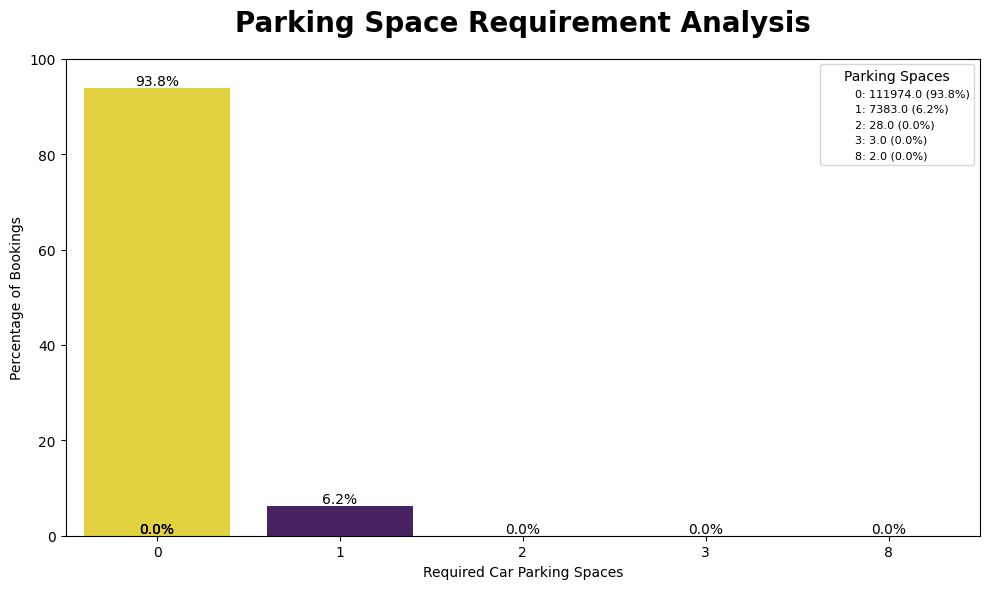

In [35]:

parking_analysis.sort_values(by='required_car_parking_spaces', inplace=True)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='required_car_parking_spaces', y='percentage', data=parking_analysis, palette='viridis', hue='percentage')
plt.title('Parking Space Requirement Analysis', pad=20, fontdict={'fontsize': '20', 'fontweight': 'bold'})
plt.xlabel('Required Car Parking Spaces')
plt.ylabel('Percentage of Bookings')
plt.xticks(rotation=0)
plt.ylim(0, 100)  
plt.tight_layout()

for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

legend_values = [f'{row["required_car_parking_spaces"]:1.0f}: {row["num_bookings"]} ({row["percentage"]:.1f}%)' for index, row in parking_analysis.iterrows()]
plt.legend(handles=[plt.Line2D([0], [0], linestyle='', label=label) for label in legend_values],
           loc='upper right', fontsize=8, title='Parking Spaces')

plt.show()


Conclusion: 

* Majority of bookings (93.8%) do not require parking, with minimal demand for 1 space (6.2%). 
 


In [36]:
# Parking Space Requirement Analysis by Hotel type

hotel_totals = hotel_cleaned.groupby('hotel')['hotel'].transform('count')

parking_analysis_hotel = hotel_cleaned.groupby(['hotel', 'required_car_parking_spaces']).size().reset_index(name='num_bookings')
parking_analysis_hotel['percentage'] = round(parking_analysis_hotel['num_bookings'] / parking_analysis_hotel.groupby('hotel')['num_bookings'].transform('sum') * 100, 1)

parking_analysis_hotel = parking_analysis_hotel.sort_values(by=['hotel', 'required_car_parking_spaces'])

parking_analysis_hotel


,hotel,required_car_parking_spaces,num_bookings,percentage
0,City Hotel,0,77404,97.6
1,City Hotel,1,1921,2.4
2,City Hotel,2,3,0.0
3,City Hotel,3,2,0.0
4,Resort Hotel,0,34570,86.3
5,Resort Hotel,1,5462,13.6
6,Resort Hotel,2,25,0.1
7,Resort Hotel,3,1,0.0
8,Resort Hotel,8,2,0.0


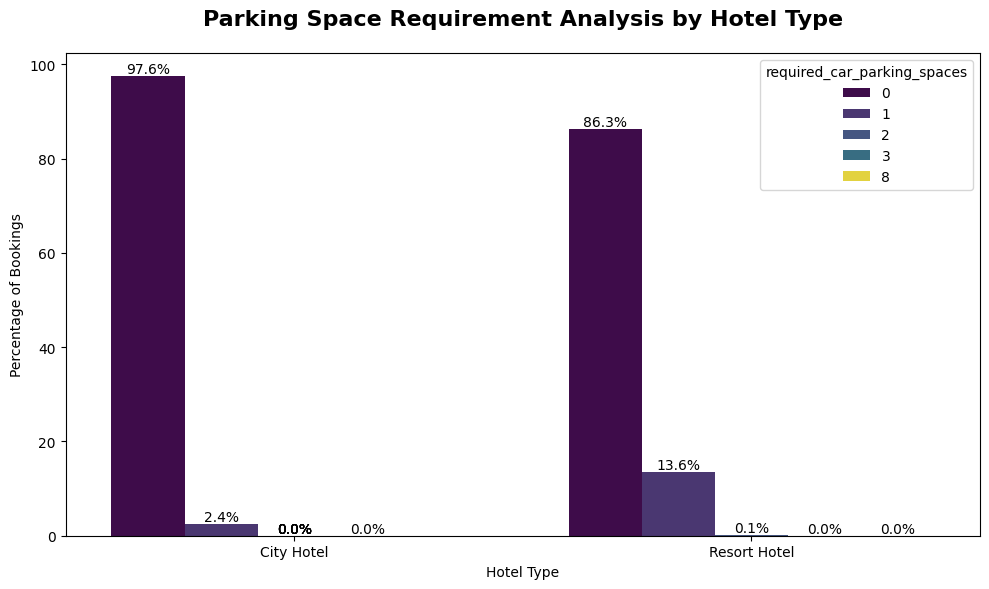

In [37]:
plt.figure(figsize=(10, 6))

barplot = sns.barplot(x='hotel', y='percentage', hue='required_car_parking_spaces', data=parking_analysis_hotel, palette='viridis')

plt.title('Parking Space Requirement Analysis by Hotel Type', pad=20, fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Hotel Type')
plt.ylabel('Percentage of Bookings')

for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Conclusion: 

* City hotels have lower parking demand (2.4% for 1 space) compared to resorts (13.6% for 1 space).
